# Contour lines

In [1]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

In [2]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

import sys
sys.path.append("..")
from src import color_blending_operator
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [3]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 300

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = (mu_x_1,mu_variance_x_1,mu_y_1,mu_variance_y_1)
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = (mu_x_2,mu_variance_x_2,mu_y_2,mu_variance_y_2)
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = (mu_x_3,mu_variance_x_3,mu_y_3,mu_variance_y_3)

In [4]:
first_color_scheme = "PuBu"
second_color_scheme = "OrRd"
third_color_scheme = "RdPu"

In [5]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)

In [6]:
Z_new, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme=first_color_scheme)
Z_new_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,10,colorscheme=second_color_scheme)
Z_new_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,10,colorscheme=third_color_scheme)

In [110]:
mixed, alpha_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, Z_new, Z, Z_new_1, Z_1,color_space = "lab")

In [111]:
contour_lines = picture_worker.find_contour_lines(Z + Z_1, 20)

In [148]:
def get_contour_lines_image(Z, num_of_contour_lines=8):
    contour_lines = picture_worker.find_contour_lines(Z, num_of_contour_lines)
    fig = Figure(figsize=(Z.shape[0]/100, Z.shape[1]/100), dpi=100)
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    wow = np.zeros([int(Z.shape[0]),int(Z.shape[1]),4],dtype=np.float)
    print(wow.shape)
    ax.imshow(wow)
    for i in contour_lines:
        for contour in i:
            pass
            ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="black")
    ax.axis('off')
    canvas.draw()
    s, (width, height) = canvas.print_to_buffer()
    return np.frombuffer(s, dtype='uint8').reshape((width,height , 4))

(300, 300, 4)


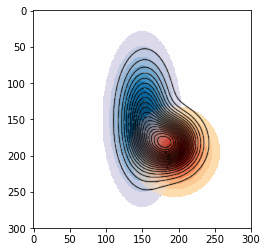

In [149]:
fig, ax = plt.subplots()
ax.imshow(mixed)
ax.imshow(get_contour_lines_image(Z + Z_1,20), interpolation="bilinear")

(300, 300, 3)


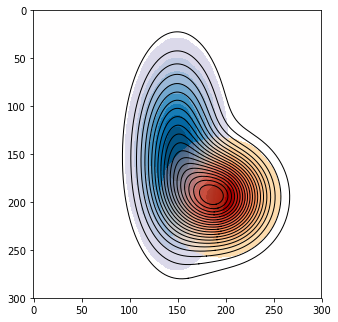

In [150]:
#displays an image
fig, ax = plt.subplots()
print(mixed.shape)
for i in contour_lines:
    for contour in i:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="black")
plt.subplots_adjust(0, 0, 1, 1)
plt.show()

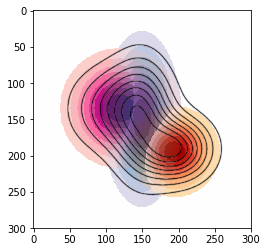

In [80]:
fig, ax = plt.subplots()
ax.imshow(mixed)
ax.imshow(image2, interpolation="bilinear")

In [12]:
mixed, alpha_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, Z_new, Z, Z_new_1, Z_1,color_space = "lab")

In [13]:
mixed, _ = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.porter_duff_source_over, mixed, alpha_new, Z_new_2, Z_2,color_space = "lab")

In [14]:
contour_lines = picture_worker.find_contour_lines(Z + Z_1 + Z_2, 8)

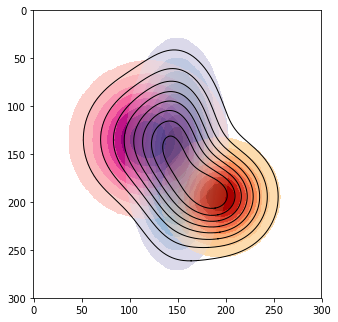

In [15]:
#displays an image
fig, ax = plt.subplots()
ax.imshow(mixed)
for i in contour_lines:
    for contour in i:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="black")
plt.subplots_adjust(0, 0, 1, 1)
plt.show()

In [16]:
mixed, alpha_new = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.lab_color_operator_weighted, Z_new, Z, Z_new_1, Z_1,color_space = "lab")

In [17]:
mixed, _ = picture_worker.combine_two_images_hierarchic(hierarchic_blending_operator.lab_color_operator_weighted, mixed, alpha_new, Z_new_2, Z_2,color_space = "lab")

In [18]:
contour_lines = picture_worker.find_contour_lines(Z + Z_1 + Z_2, 8)

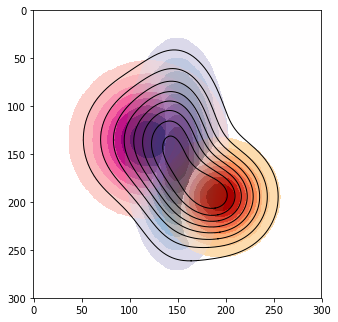

In [19]:
#displays an image
fig, ax = plt.subplots()
ax.imshow(mixed, interpolation='nearest')
for i in contour_lines:
    for contour in i:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="black")
plt.subplots_adjust(0, 0, 1, 1)
plt.show()

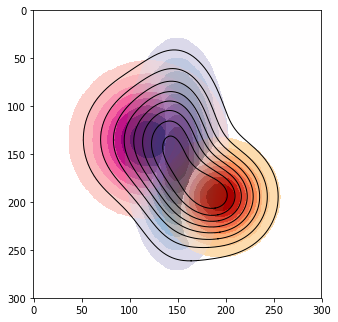

In [20]:
#displays an image
fig, ax = plt.subplots()
ax.imshow(mixed)
for i in contour_lines:
    for contour in i:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=1, color="black")
plt.subplots_adjust(0, 0, 1, 1)
plt.show()